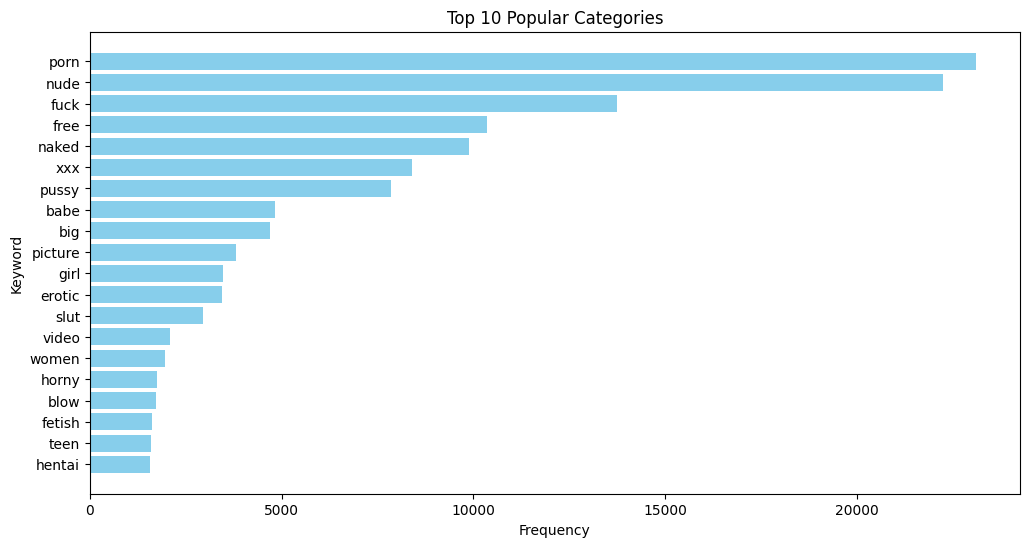

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a CSV with the results of the SQL query.
# Load the CSV into a pandas DataFrame.
df = pd.read_csv('/Users/mariembensalah/Desktop/BI/BI_Project_1/data/count_keyword1.csv')

# Let's plot the top 10 categories.
top_categories = df.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_categories['KEYWORD'], top_categories['FREQUENCY'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 10 Popular Categories')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest count on top
plt.show()


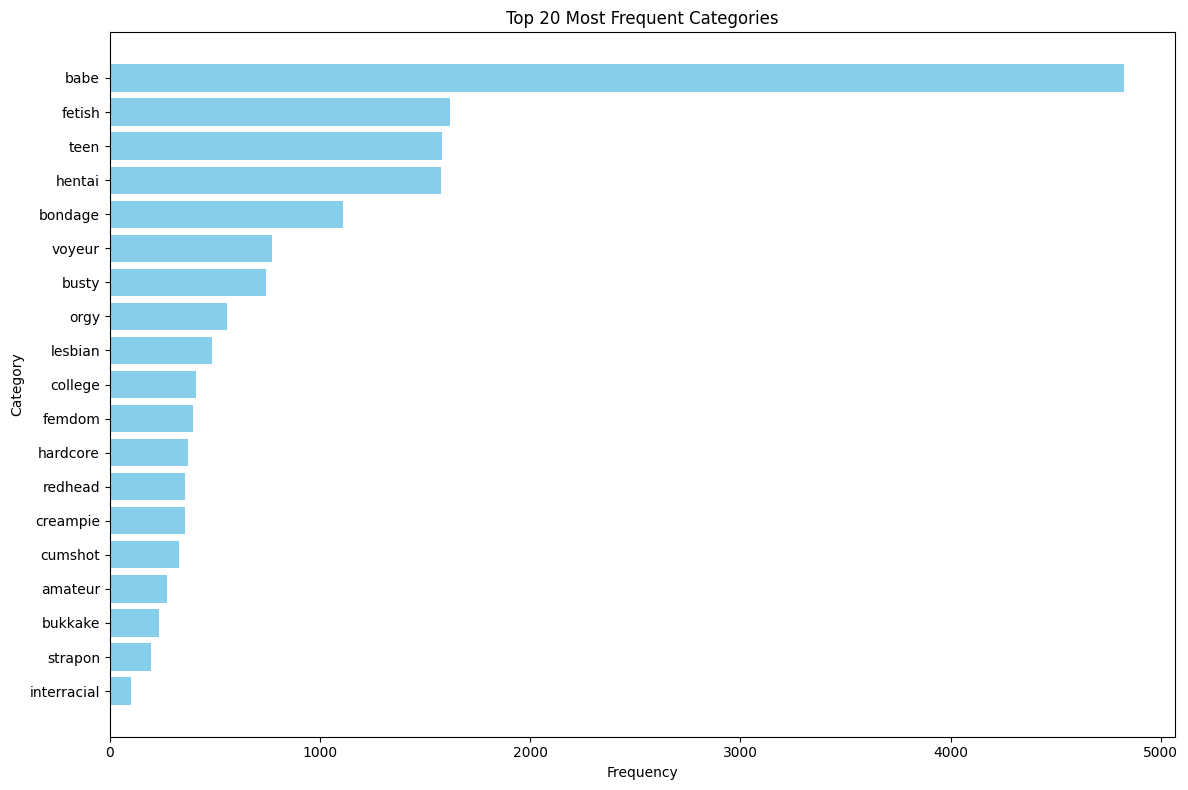

In [1]:
# Let's proceed with the provided files.
# I will load the CSV files, merge them, and then plot the top 20 frequent categories.

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into pandas DataFrames
categories_df = pd.read_csv('./data/categories.csv')
keywords_df = pd.read_csv('./data/count_keyword1.csv')

# Merge the DataFrames on the category
merged_df = pd.merge(keywords_df, categories_df, left_on='KEYWORD', right_on='CATEGORY')

# We assume 'FREQUENCY' is the column in keywords_df that contains the frequency count
# Now, sort the merged DataFrame by frequency and get the top 20 frequent categories
top_20_categories = merged_df.sort_values(by='FREQUENCY', ascending=False).head(20)

# Plotting the top 20 categories
plt.figure(figsize=(12, 8))
plt.barh(top_20_categories['CATEGORY'], top_20_categories['FREQUENCY'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 20 Most Frequent Categories')
plt.gca().invert_yaxis()  # This will display the highest frequency at the top
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


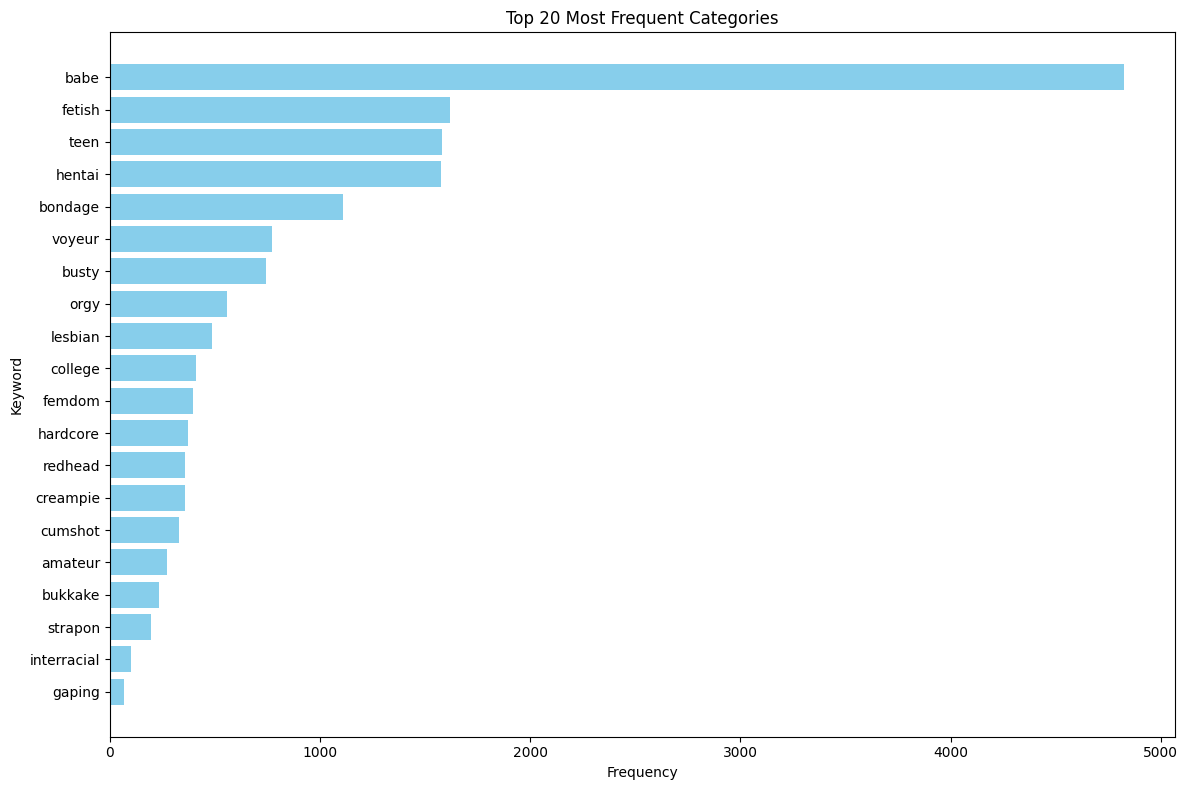

In [2]:
# Since we only want to consider keywords that are actually categories, we need to filter the keywords_df
# to only include rows where the keyword is in the categories listed in categories_df.

# Convert categories to a list for filtering
category_list = categories_df['CATEGORY'].tolist()

# Filter the keywords DataFrame
filtered_keywords_df = keywords_df[keywords_df['KEYWORD'].isin(category_list)]

# Now, sort by frequency and get the top 20 most frequent categories
top_20_keywords = filtered_keywords_df.sort_values(by='FREQUENCY', ascending=False).head(20)

# Plotting the top 20 keywords that are valid categories
plt.figure(figsize=(12, 8))
plt.barh(top_20_keywords['KEYWORD'], top_20_keywords['FREQUENCY'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 20 Most Frequent Categories')
plt.gca().invert_yaxis()  # This will display the highest frequency at the top
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


# KEYWORD 2

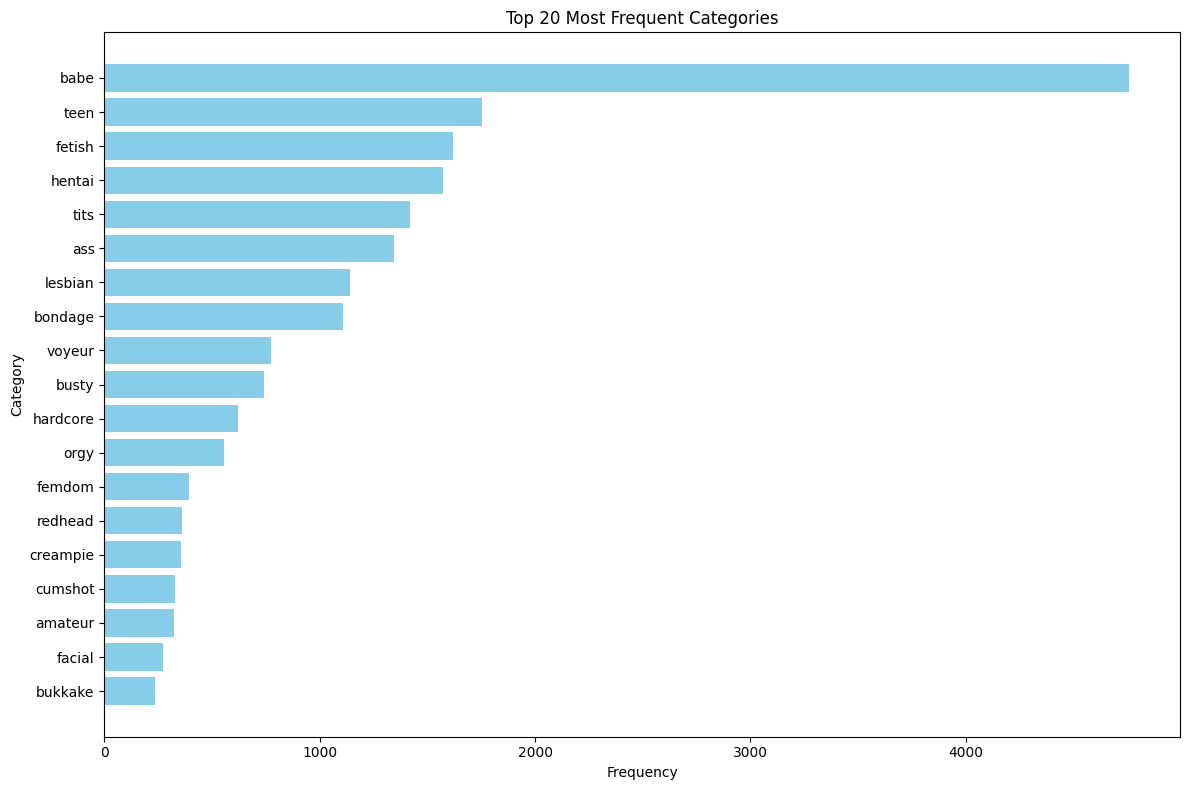

In [3]:
import matplotlib.pyplot as plt

# Load the CSV files into pandas DataFrames
categories_df = pd.read_csv('./data/categories.csv')
keywords_df = pd.read_csv('./data/count_keyword2.csv')

# Merge the DataFrames on the category
merged_df = pd.merge(keywords_df, categories_df, left_on='KEYWORD', right_on='CATEGORY')

# We assume 'FREQUENCY' is the column in keywords_df that contains the frequency count
# Now, sort the merged DataFrame by frequency and get the top 20 frequent categories
top_20_categories = merged_df.sort_values(by='FREQUENCY', ascending=False).head(20)

# Plotting the top 20 categories
plt.figure(figsize=(12, 8))
plt.barh(top_20_categories['CATEGORY'], top_20_categories['FREQUENCY'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 20 Most Frequent Categories')
plt.gca().invert_yaxis()  # This will display the highest frequency at the top
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the plot
plt.show()

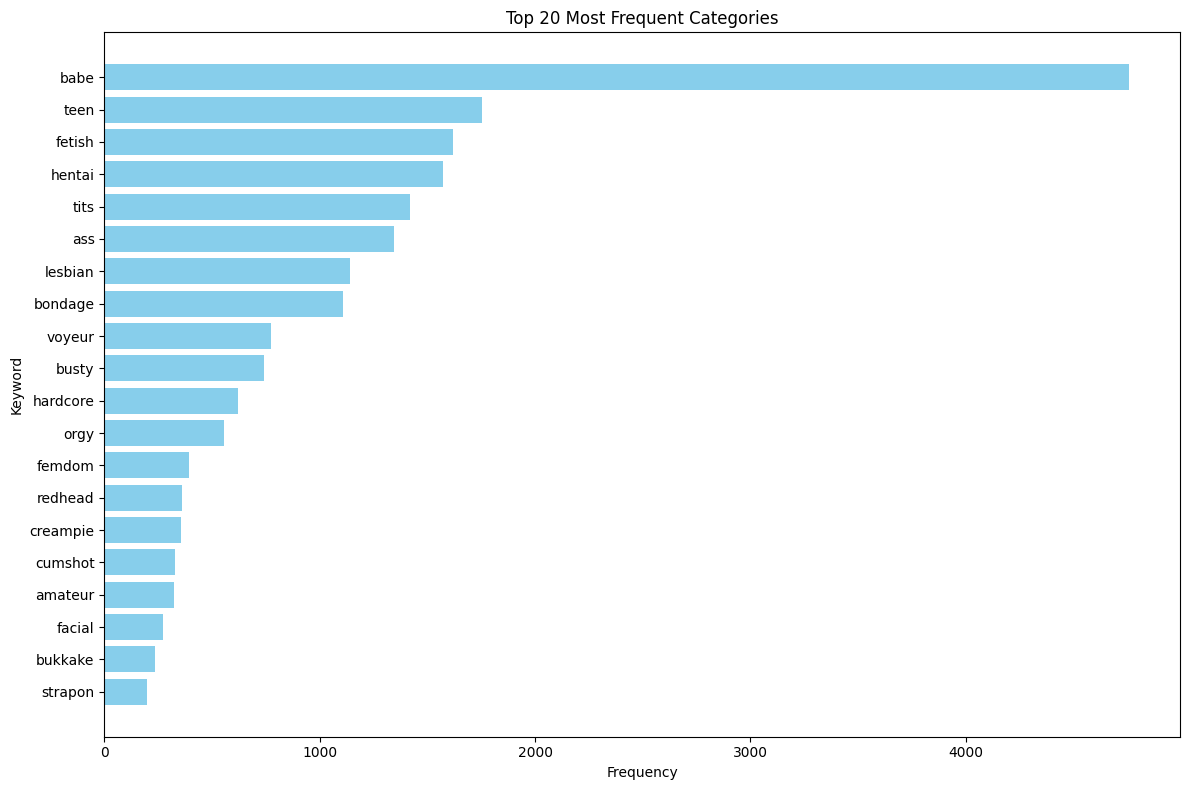

In [4]:
# Since we only want to consider keywords that are actually categories, we need to filter the keywords_df
# to only include rows where the keyword is in the categories listed in categories_df.

# Convert categories to a list for filtering
category_list = categories_df['CATEGORY'].tolist()

# Filter the keywords DataFrame
filtered_keywords_df = keywords_df[keywords_df['KEYWORD'].isin(category_list)]

# Now, sort by frequency and get the top 20 most frequent categories
top_20_keywords = filtered_keywords_df.sort_values(by='FREQUENCY', ascending=False).head(20)

# Plotting the top 20 keywords that are valid categories
plt.figure(figsize=(12, 8))
plt.barh(top_20_keywords['KEYWORD'], top_20_keywords['FREQUENCY'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 20 Most Frequent Categories')
plt.gca().invert_yaxis()  # This will display the highest frequency at the top
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the plot
plt.show()

# BOTH

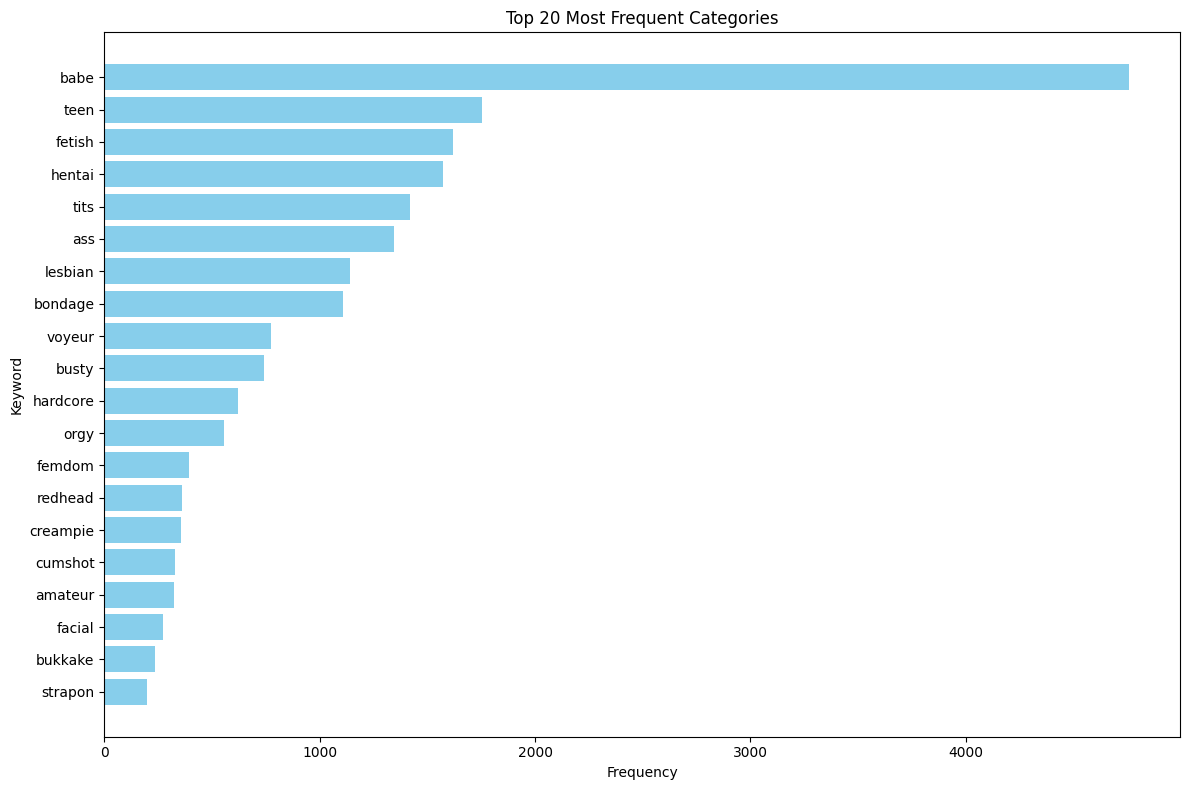

In [5]:
# Now we have a third CSV file which presumably contains keyword2 and its frequency.
# We will load this new CSV, and then combine it with the already filtered keyword1 DataFrame
# to determine the 20 most popular categories based on both keyword1 and keyword2 frequencies.

# Load the new CSV file into a pandas DataFrame
keyword2_df = pd.read_csv('./data/count_keyword2.csv')

# Combine the keyword1 and keyword2 DataFrames and sum the frequencies
combined_keywords_df = pd.concat([filtered_keywords_df, keyword2_df])

# Group by keyword and sum the frequencies, then reset the index to turn 'Keyword' back into a column
grouped_keywords_df = combined_keywords_df.groupby('KEYWORD', as_index=False).sum()

# Filter the DataFrame to only include rows where the keyword is a category
grouped_filtered_keywords_df = grouped_keywords_df[grouped_keywords_df['KEYWORD'].isin(category_list)]

# Sort the grouped DataFrame by frequency and get the top 20 popular categories
top_20_combined_keywords = grouped_filtered_keywords_df.sort_values(by='FREQUENCY', ascending=False).head(20)

# Plotting the top 20 keywords that are valid categories
plt.figure(figsize=(12, 8))
plt.barh(top_20_keywords['KEYWORD'], top_20_keywords['FREQUENCY'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 20 Most Frequent Categories')
plt.gca().invert_yaxis()  # This will display the highest frequency at the top
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


LOOK FOR CATEGORIES IN THE QUERIES

In [6]:
import pandas as pd

# Read CSV files
category_df = pd.read_csv('./data/categories.csv')  
queries_df = pd.read_csv('./data/PORN_QUERIES.csv')    

# Splitting queries into words
# Assuming each query is a single string of words separated by spaces
queries_df['words'] = queries_df['QUERY'].str.lower().str.split()

# Flatten the list of words into a single Series
all_words = queries_df['words'].explode()

# Count the frequency of each category in the queries
category_counts = {}
for category in category_df['CATEGORY'].str.lower().unique():
    category_counts[category] = all_words[all_words == category].count()

# Convert the counts to a DataFrame for better visualization
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Frequency'])

print(category_counts_df)


        Category  Frequency
0        amateur        438
1             3d         90
2             4k          0
3           anal        478
4           arab         42
..           ...        ...
129         tits       1223
130          toy         39
131  transgender          9
132      vintage        141
133       voyeur        314

[134 rows x 2 columns]


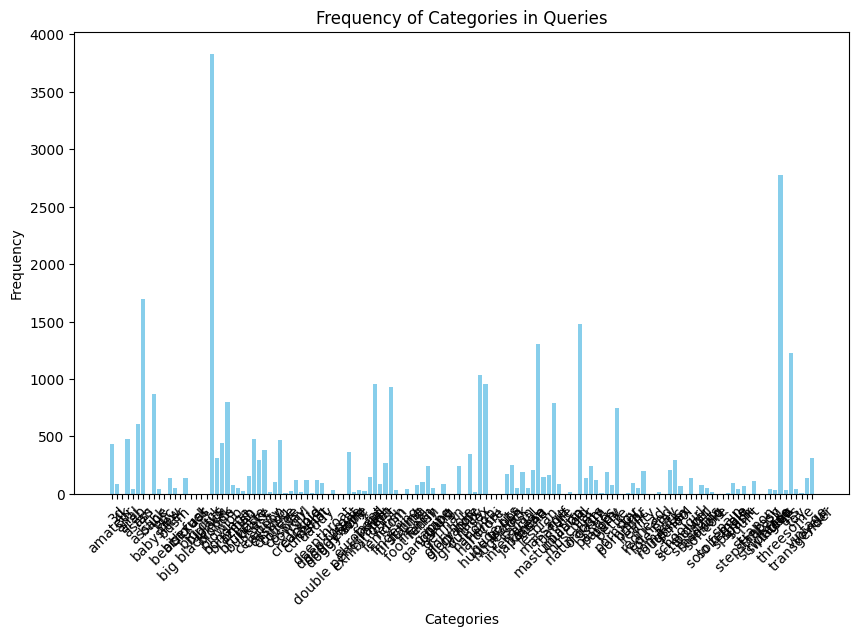

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(category_counts_df['Category'], category_counts_df['Frequency'], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Queries')
plt.xticks(rotation=45)
plt.show()

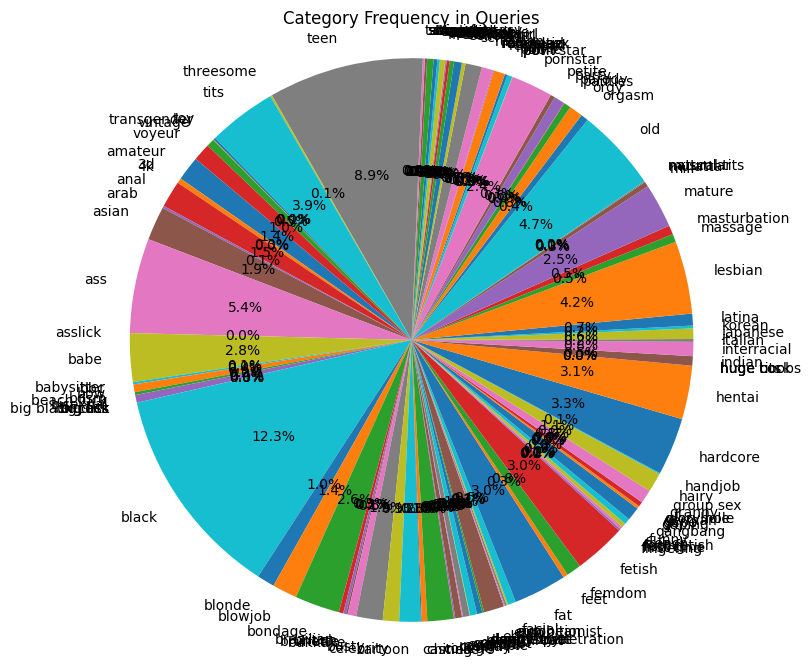

In [8]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_df['Frequency'], labels=category_counts_df['Category'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Category Frequency in Queries')
plt.show()

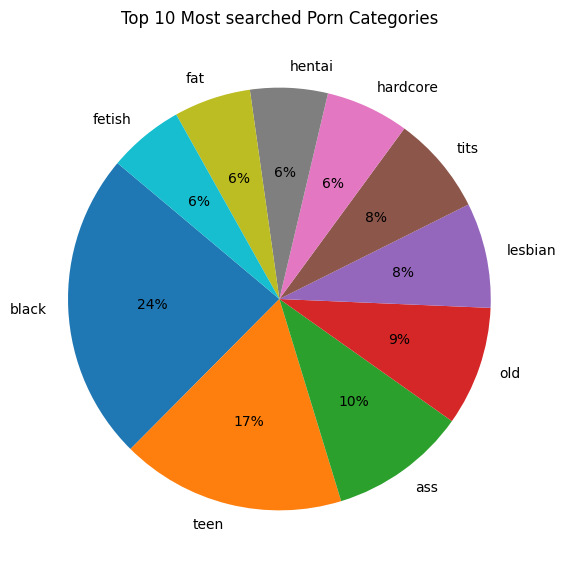

In [20]:
category_counts_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Select the top 20 categories
top_20_categories = category_counts_df.head(10)

# Plotting a pie chart for the top 20 categories
plt.figure(figsize=(6, 6))
plt.pie(top_20_categories['Frequency'], labels=top_20_categories['Category'], autopct='%1.0f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Adjust layout to add space between title and plot
plt.subplots_adjust(top=1.0)
plt.title('Top 10 Most searched Porn Categories')
plt.show()

# MOST CLICKED WEBSITES

In [ ]:
SELECT
    u.URL,
    COUNT(*) AS ClickCount
FROM
    EXA_DB.PORN_QUERIES pq
JOIN
    EXA_DB.FACTS f ON pq.ID = f.QUERYID
JOIN
    EXA_DB.URLDIM u ON f.URLID = u.ID
WHERE
    f.CLICK = 'true'
GROUP BY
    u.URL
ORDER BY
    ClickCount DESC;

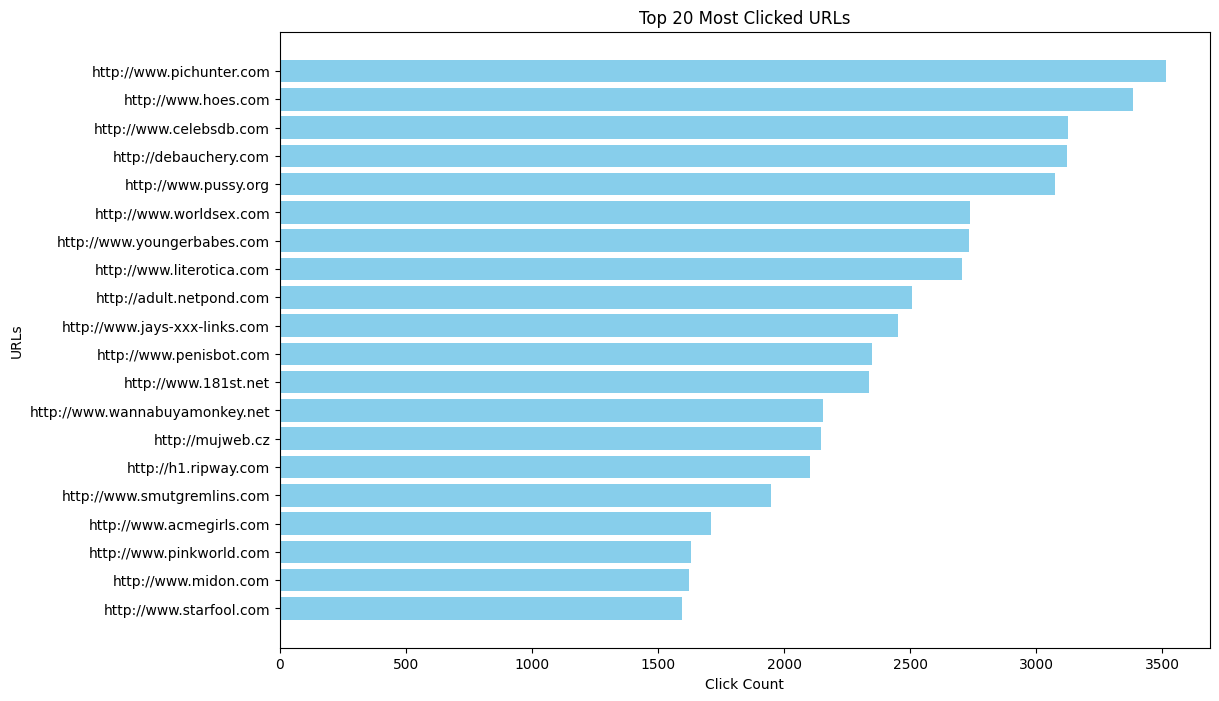

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file (replace 'path_to_csv' with your CSV file's path)
data_csv_path = './data/most_clicked.csv'
click_data_df = pd.read_csv(data_csv_path)

# Assuming the data has columns 'URL' and 'ClickCount', let's visualize the top 20 most clicked URLs
top_clicked_urls = click_data_df.head(20)

# Plotting a bar chart for the top 20 clicked URLs
plt.figure(figsize=(12, 8))
plt.barh(top_clicked_urls['URL'][::-1], top_clicked_urls['ClickCount'][::-1], color='skyblue')
plt.xlabel('Click Count')
plt.ylabel('URLs')
plt.title('Top 20 Most Clicked URLs')
plt.show()


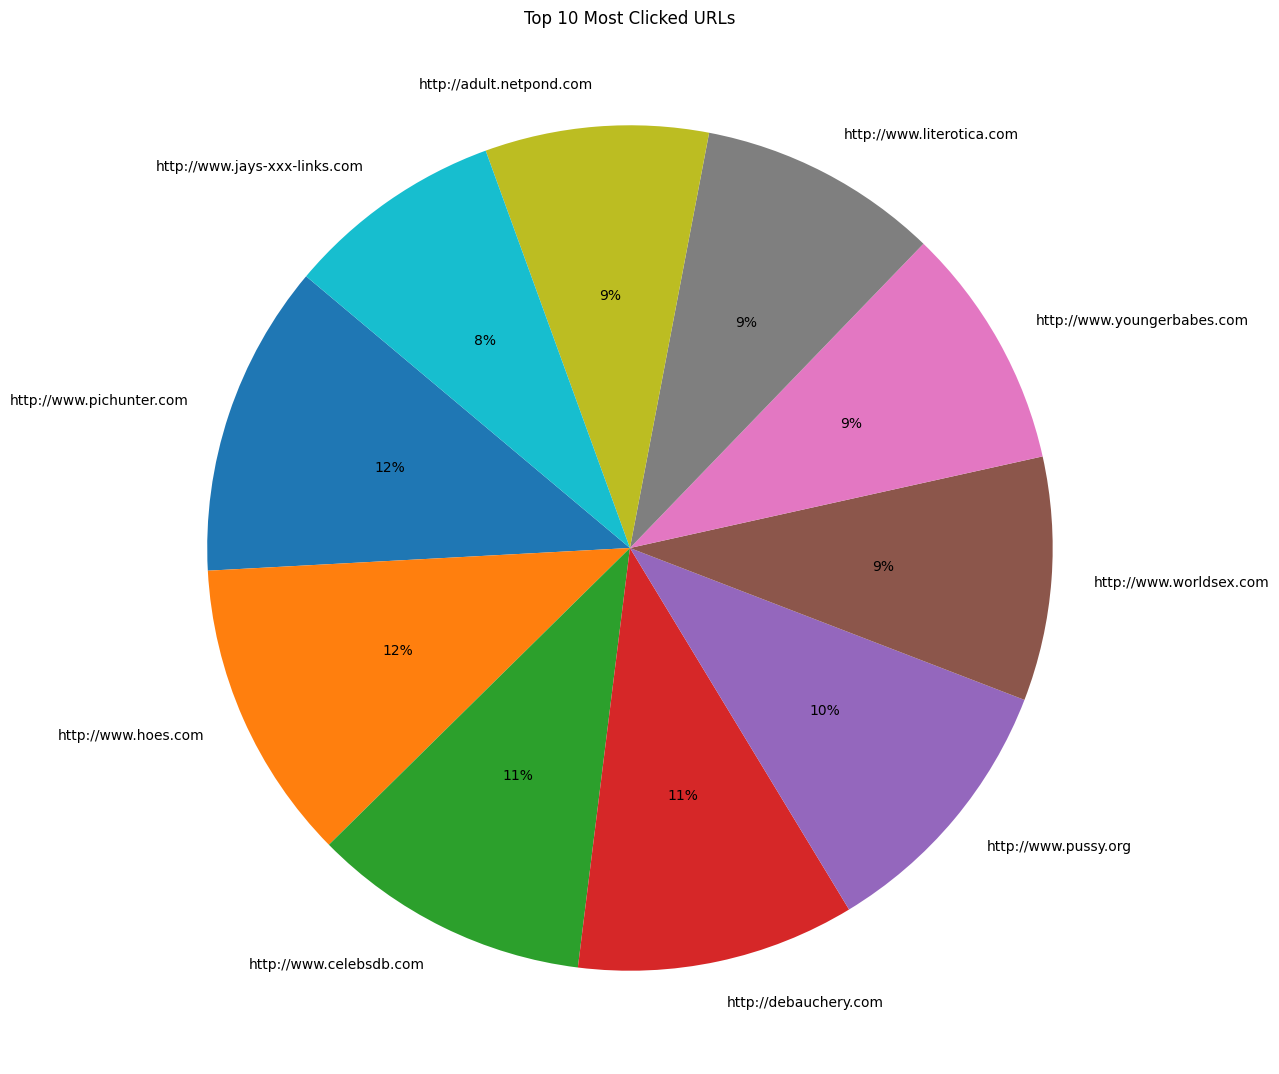

In [14]:
top_clicked_urls = click_data_df.head(10)
plt.figure(figsize=(12, 8))
plt.pie(top_clicked_urls['ClickCount'], labels=top_clicked_urls['URL'], autopct='%1.0f%%', startangle=140)
plt.axis('equal')
plt.subplots_adjust(top=1.4)
plt.title('Top 10 Most Clicked URLs')
plt.show()


# QUERIES THAT GENERATED MOST CLICKS

In [ ]:
SELECT
    pq.Query,
    COUNT(*) AS ClickCount
FROM
    EXA_DB.PORN_QUERIES pq
JOIN
    EXA_DB.FACTS f ON pq.ID = f.QUERYID
WHERE
    f.CLICK = 'true'
GROUP BY
    pq.Query  
ORDER BY
    ClickCount DESC;

In [ ]:
SELECT
    pq.Query,
    td."month",
    COUNT(*) AS ClickCount
FROM
    EXA_DB.PORN_QUERIES pq
JOIN
    EXA_DB.FACTS f ON pq.ID = f.QUERYID
JOIN
    EXA_DB.TIMEDIM td ON f.TIMEID = td.ID  -- Assuming TIME_DIM is joined via TIMEID
WHERE
    f.CLICK = 'true'
GROUP BY
    CUBE(pq.Query, td."month")
ORDER BY
    ClickCount DESC;

In [ ]:
SELECT
    pq.Query, -- This assumes there is a column 'Query' in P_QUERIES that contains the query text.
    f.CLICK, -- This column shows if the individual fact was clicked (should be 'true' for all in this result set).
    COUNT(*) OVER (PARTITION BY pq.Query) AS TotalClicks -- This counts total clicks per query, including duplicates.
FROM
    EXA_DB.PORN_QUERIES pq
JOIN
    EXA_DB.FACTS f ON pq.ID = f.QUERYID
WHERE
    f.CLICK = 'true'
ORDER BY
    TotalClicks DESC, pq.Query;

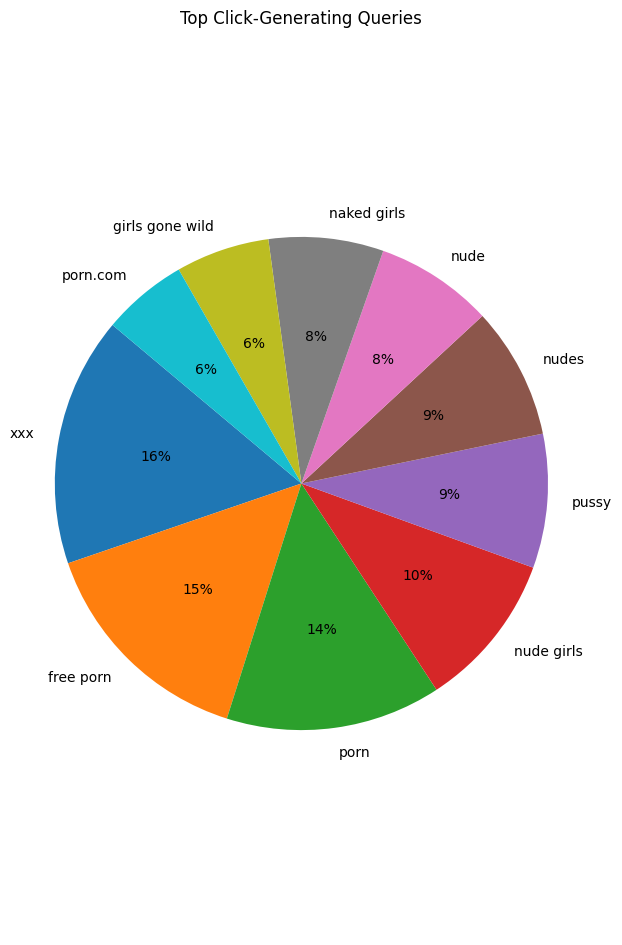

In [21]:
# Load the data from the CSV file
data_csv_path = './data/queries_most_clicks.csv'  # Replace with the actual CSV file path
click_data_df = pd.read_csv(data_csv_path)

# Assuming the data has columns 'QueryCategoryOrKeyword' and 'ClickCount', let's visualize the top categories/keywords
top_click_generators = click_data_df.head(10)

# Plotting a pie chart for the top click-generating queries/categories/keywords
plt.figure(figsize=(7, 7))
plt.pie(top_click_generators['ClickCount'], labels=top_click_generators['Query'], autopct='%1.0f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.title('Top Click-Generating Queries')
plt.subplots_adjust(top=1.4)  # Adjust if necessary to ensure the title and pie chart fit well
plt.show()


# CATEGORIES THAT GENERATED MOST CLICKS

In [ ]:
SELECT
    cat.CATEGORY,
    COUNT(*) AS ClickCount
FROM
    EXA_DB.MAP_QUERY_CATEGORY MQ
JOIN
    EXA_DB.FACTS f ON MQ.QUERY_ID = f.QUERYID
JOIN
    EXA_DB.CATEGORY cat ON MQ.CATEGORY_ID = cat.ID
WHERE
    f.CLICK = 'true'
GROUP BY
    cat.CATEGORY
ORDER BY
    ClickCount DESC;

In [ ]:
SELECT
    cat.CATEGORY,
    qd.QUERY,
    COUNT(*) AS ClickCount
FROM
    EXA_DB.MAP_QUERY_CATEGORY MQ
JOIN
    EXA_DB.FACTS f ON MQ.QUERY_ID = f.QUERYID
JOIN
    EXA_DB.CATEGORY cat ON MQ.CATEGORY_ID = cat.ID
JOIN
    EXA_DB.QUERYDIM qd ON f.QUERYID = qd.ID
WHERE
    f.CLICK = 'true'
GROUP BY
    GROUPING SETS ((cat.CATEGORY), (qd.QUERY), (cat.CATEGORY, qd.QUERY))
ORDER BY
    ClickCount DESC;

In [ ]:
SELECT
    cat.CATEGORY,
    qd.QUERY,  -- Replace with actual attribute name
    COUNT(*) AS ClickCount
FROM
    EXA_DB.MAP_QUERY_CATEGORY MQ
JOIN
    EXA_DB.FACTS f ON MQ.QUERY_ID = f.QUERYID
JOIN
    EXA_DB.CATEGORY cat ON MQ.CATEGORY_ID = cat.ID
JOIN
    EXA_DB.QUERYDIM qd ON f.QUERYID = qd.ID
WHERE
    f.CLICK = 'true'
GROUP BY
    CUBE(cat.CATEGORY, qd.QUERY)
ORDER BY
    ClickCount DESC;

In [ ]:
SELECT
    cat.CATEGORY,
    COUNT(*) AS ClickCount
FROM
    EXA_DB.MAP_QUERY_CATEGORY MQ
JOIN
    EXA_DB.FACTS f ON MQ.QUERY_ID = f.QUERYID
JOIN
    EXA_DB.CATEGORY cat ON MQ.CATEGORY_ID = cat.ID
WHERE
    f.CLICK = 'true'
GROUP BY
    ROLLUP(cat.CATEGORY)
ORDER BY
    ClickCount DESC;

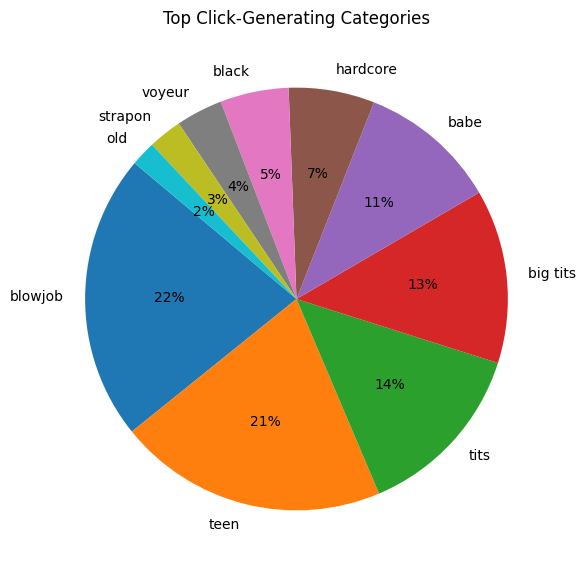

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
# Load the data from the CSV file
data_csv_path = './data/category_most_clicks.csv'  # Replace with the actual CSV file path
click_data_df = pd.read_csv(data_csv_path)

# Assuming the data has columns 'QueryCategoryOrKeyword' and 'ClickCount', let's visualize the top categories/keywords
top_click_generators = click_data_df.head(10)

# Plotting a pie chart for the top click-generating queries/categories/keywords
plt.figure(figsize=(6, 6))
plt.pie(top_click_generators['ClickCount'], labels=top_click_generators['Category'], autopct='%1.0f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.title('Top Click-Generating Categories')
plt.subplots_adjust(top=1.0)  # Adjust if necessary to ensure the title and pie chart fit well
plt.show()